# This is a notebook for producing tSNE downscaled plots of Molecules produced by LSTM, PGFS and those in the filtered enamine set.

In [1]:
import os
os.chdir('../')
os.getcwd()

'/home/boto/PycharmProjects/gym-PGFS-bias'

In [15]:
from rdkit import Chem
from rdkit.Chem import AllChem

import pickle
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

from gym_PGFS.chemwrapped import MolDSetDescriptorsNumpy, ChemMolFromSmilesWrapper
from sklearn.manifold import TSNE

In [3]:
# load the preprocesed data for the reactants
with open("./data/run_A/preprocessed/reactants_processed.pkl", "rb") as f:
    enamine_reactants = pickle.load(f)
enamine_reactants.head()

,smiles,n_heavy,react_0_0,react_1_0,react_1_1,react_2_0,react_2_1,react_3_0,react_3_1,react_4_0,...,react_59_0,react_60_0,react_61_0,react_62_0,ECFP_2_1024,ECFP_2_512,ECFP_2_256,ECFP_2_128,MolD,n_templates
0,C[Si](C)(C)C#Cc1cc(Br)cnc1O,14,False,False,False,False,False,False,False,False,...,False,False,False,False,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[9.41278376165281, -1.395623425296044, 0.00097...",10
1,FC(F)(F)c1ccc(C#CCBr)cc1,14,False,False,False,False,False,False,False,False,...,False,False,False,False,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, ...","[12.12805894116906, -4.276407194822373, 0.5079...",7
2,CC(C)[Si](C#CBr)(C(C)C)C(C)C,13,False,False,False,False,False,False,False,False,...,False,False,False,False,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[3.5, -1.435570987654321, 0.7338425925925924, ...",7
3,CC(C)C(Br)C(=O)C#C[Si](C)(C)C,13,False,False,False,False,False,False,False,False,...,True,True,False,False,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, ...","[11.432893518518519, -1.403403722600151, 0.011...",11
4,CC[Si](C#CC1(Br)CC1)(CC)CC,13,False,False,False,False,False,False,False,False,...,False,False,False,False,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...","[3.678487811791383, -1.1783024691358024, 0.240...",7


In [4]:
enamine_reactants = enamine_reactants[['smiles', 'MolD']]
enamine_reactants

,smiles,MolD
0,C[Si](C)(C)C#Cc1cc(Br)cnc1O,"[9.41278376165281, -1.395623425296044, 0.00097..."
1,FC(F)(F)c1ccc(C#CCBr)cc1,"[12.12805894116906, -4.276407194822373, 0.5079..."
2,CC(C)[Si](C#CBr)(C(C)C)C(C)C,"[3.5, -1.435570987654321, 0.7338425925925924, ..."
3,CC(C)C(Br)C(=O)C#C[Si](C)(C)C,"[11.432893518518519, -1.403403722600151, 0.011..."
4,CC[Si](C#CC1(Br)CC1)(CC)CC,"[3.678487811791383, -1.1783024691358024, 0.240..."
...,...,...
92404,OCCS,"[7.798611111111111, 0.183641975308642, 0.18364..."
92405,CC(=O)S,"[9.308641975308642, -0.13888888888888862, 0.13..."
92406,NCCS,"[4.951388888888889, 0.683641975308642, 0.68364..."
92407,O=Cc1ccc(C(=O)O)c([N+](=O)[O-])c1,"[10.53305933484505, -1.394306500377929, 0.0710..."


In [27]:
np_enam = np.stack(enamine_reactants['MolD'].sample(10000).tolist())
print(np_enam[0])
np_enam = np_enam.astype(float)#.iloc[0]
np_enam.dtype

[8.49647083e+00 8.49537037e-02 8.49537037e-02 6.81992722e-01
 2.06596000e+02 1.35714286e+00 2.40338959e+00 1.23965414e+01
 1.09709726e+01 1.16009399e+01 1.21327341e+01 0.00000000e+00
 0.00000000e+00 2.94375685e+01 0.00000000e+00 5.82440450e+00
 5.82440450e+00 1.09709726e+01 0.00000000e+00 1.10091230e+01
 1.21327341e+01 0.00000000e+00 5.82380000e-01 3.39506173e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 6.06922131e+00
 9.56610206e-01 1.16009399e+01 1.13311129e+01 1.84600542e+01
 2.02800239e+01 1.68628314e+01 0.00000000e+00]


dtype('float64')

In [10]:
tisne = TSNE(n_components=2, init='random', verbose=3, n_jobs=-1)#learning_rate='auto', 
X_embed = tisne.fit_transform(np_enam)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 92409 samples in 0.490s...
[t-SNE] Computed neighbors for 92409 samples in 69.804s...
[t-SNE] Computed conditional probabilities for sample 1000 / 92409
[t-SNE] Computed conditional probabilities for sample 2000 / 92409
[t-SNE] Computed conditional probabilities for sample 3000 / 92409
[t-SNE] Computed conditional probabilities for sample 4000 / 92409
[t-SNE] Computed conditional probabilities for sample 5000 / 92409
[t-SNE] Computed conditional probabilities for sample 6000 / 92409
[t-SNE] Computed conditional probabilities for sample 7000 / 92409
[t-SNE] Computed conditional probabilities for sample 8000 / 92409
[t-SNE] Computed conditional probabilities for sample 9000 / 92409
[t-SNE] Computed conditional probabilities for sample 10000 / 92409
[t-SNE] Computed conditional probabilities for sample 11000 / 92409
[t-SNE] Computed conditional probabilities for sample 12000 / 92409
[t-SNE] Computed conditional probabilities for sa

In [12]:
# save the tsne embedding from the reactants
with open("./data/tsne_reactants.pkl", "wb") as f:
    pickle.dump(tisne, f)

In [13]:
# load the pickle here

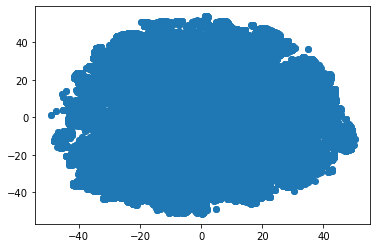

In [17]:
# load the outputs of the models
fig = plt.figure()
plt.scatter(X_embed[:, 0], X_embed[:, 1])

In [43]:
run_dirs = {'./data/run_B': 'CHEMBL3888429', 
            './data/run_A': 'CHEMBL1909140', 
            './data/run_C': 'CHEMBL1909203'}
dsets = ['CHEMBL3888429', 'CHEMBL1909140', 'CHEMBL1909203']

lstm_out = {}

for name in dsets:
    lstm_out[name] = pd.read_csv(f"./data/lstm_hc/{name}_outcome.csv")
    
# now do the same for an output of pgfs


pgfs_out = {}

for location, name in run_dirs.items():
    df = pd.read_csv(f"{location}/smiles_collected.csv")
    print(len(df))
    print(df['step'].unique()) 
    print("Picking 5")
    df = df[df['step']==5].reset_index().drop('index', 1)[['smiles', 'epoch', 'type', 'value']].sort_values(by=['type'], ascending=False).sort_values(by=['epoch'])
    pgfs_out[name] = df


# load the datasets used to train the classifiers for OS and MCS
mcs_data = {}
dcs_data = {}

## TODO: brush up/find out what exactly does my version of MolD contain 

for name in dsets:
    dcs_data[name] = pd.read_csv(f"./data/mgenfail_assays/{name}/DCS_SPLIT.csv")

for name in dsets:
    mcs_data[name] = pd.read_csv(f"./data/mgenfail_assays/{name}/MCS_SPLIT.csv")
    
    

37800
[0 1 2 3 4 5]
Picking 5
91800
[0 1 2 3 4 5]
Picking 5
91800
[0 1 2 3 4 5]
Picking 5


/tmp/ipykernel_22131/2371276863.py:21: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df[df['step']==5].reset_index().drop('index', 1)[['smiles', 'epoch', 'type', 'value']].sort_values(by=['type'], ascending=False).sort_values(by=['epoch'])


In [44]:
# compute restrict the molecule to the last epoch as well as to only one set of smiles
lstms = {}
pgfss = {}
for dataset_name in pgfs_out.keys():
    # get the lstm and pgfs datasets ( only dcs scores of the last epoch )
    lstm = lstm_out[dataset_name]
    last_lstm = lstm.epoch.max()
    lstm = lstm[(lstm['type']=='DCS_MODE')&(lstm['epoch']==last_lstm)]
    
    # compute the fingerprints
    lstm = np.stack(lstm.smiles.apply(MolDSetDescriptorsNumpy).tolist())
    
    pgfs = pgfs_out[dataset_name]
    last_pgfs = pgfs.epoch.max()
    pgfs = pgfs[(pgfs['type']=='DCS_MODE')&(pgfs['epoch']==last_pgfs)]
    
    # compute the fingerprints
    pgfs = np.stack(pgfs.smiles.apply(MolDSetDescriptorsNumpy).tolist())
    
    # now make a boxplot
    lstms[dataset_name] = lstm
    pgfss[dataset_name] = pgfs
    


In [45]:
dcss = {}
mcss = {}

for dataset_name in dsets:

    # compute the fingerprints
    dcs = dcs_data[dataset_name]
    dcs = np.stack(dcs.smiles.apply(MolDSetDescriptorsNumpy).tolist())
    
    # compute the fingerprints
    mcs = mcs_data[dataset_name]
    mcs = np.stack(mcs.smiles.apply(MolDSetDescriptorsNumpy).tolist())

    # now make a boxplot
    dcss[dataset_name] = dcs
    mcss[dataset_name] = mcs
    

In [46]:
tisne = TSNE(n_components=2, init='random', verbose=3, n_jobs=-1)#learning_rate='auto', 

# merge all the data together
all_mold = np.concatenate([np_enam] + list(lstms.values()) + list(pgfss.values()) + list(dcss.values()) + list(mcss.values()))
print(all_mold.shape)
all_embed = tisne.fit_transform(all_mold)

(14047, 35)
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 14047 samples in 0.058s...
[t-SNE] Computed neighbors for 14047 samples in 1.733s...
[t-SNE] Computed conditional probabilities for sample 1000 / 14047
[t-SNE] Computed conditional probabilities for sample 2000 / 14047
[t-SNE] Computed conditional probabilities for sample 3000 / 14047
[t-SNE] Computed conditional probabilities for sample 4000 / 14047
[t-SNE] Computed conditional probabilities for sample 5000 / 14047
[t-SNE] Computed conditional probabilities for sample 6000 / 14047
[t-SNE] Computed conditional probabilities for sample 7000 / 14047
[t-SNE] Computed conditional probabilities for sample 8000 / 14047
[t-SNE] Computed conditional probabilities for sample 9000 / 14047
[t-SNE] Computed conditional probabilities for sample 10000 / 14047
[t-SNE] Computed conditional probabilities for sample 11000 / 14047
[t-SNE] Computed conditional probabilities for sample 12000 / 14047
[t-SNE] Computed conditional probabili

In [47]:
all_embed_safe = np.copy(all_embed)
# all_embed = np.copy(all_embed_safe)

In [48]:
pgfs_e = {}
lstm_e = {}
dcs_e = {}
mcs_e = {}
training_set_mols = {}

# first take off the embedded reactants
reactants_embedded = all_embed[:10000, :]
all_embed = all_embed[10000:, :]

for src, grandpa in [[lstm_e, lstms], [pgfs_e, pgfss],
                    [dcs_e, dcss], [mcs_e, mcss]]:
    for key in dsets:
        # get the size of the original array
        sz = grandpa[key].shape[0]
        print(sz)
        # slice off and add to the dictionary and remove that piece from the stack
        src[key] = all_embed[:sz, :]
        print(src[key].shape)
        all_embed = all_embed[sz:, :]
        print(all_embed.shape)
        

480
(480, 2)
(3567, 2)
481
(481, 2)
(3086, 2)
435
(435, 2)
(2651, 2)
100
(100, 2)
(2551, 2)
100
(100, 2)
(2451, 2)
100
(100, 2)
(2351, 2)
334
(334, 2)
(2017, 2)
421
(421, 2)
(1596, 2)
421
(421, 2)
(1175, 2)
333
(333, 2)
(842, 2)
421
(421, 2)
(421, 2)
421
(421, 2)
(0, 2)


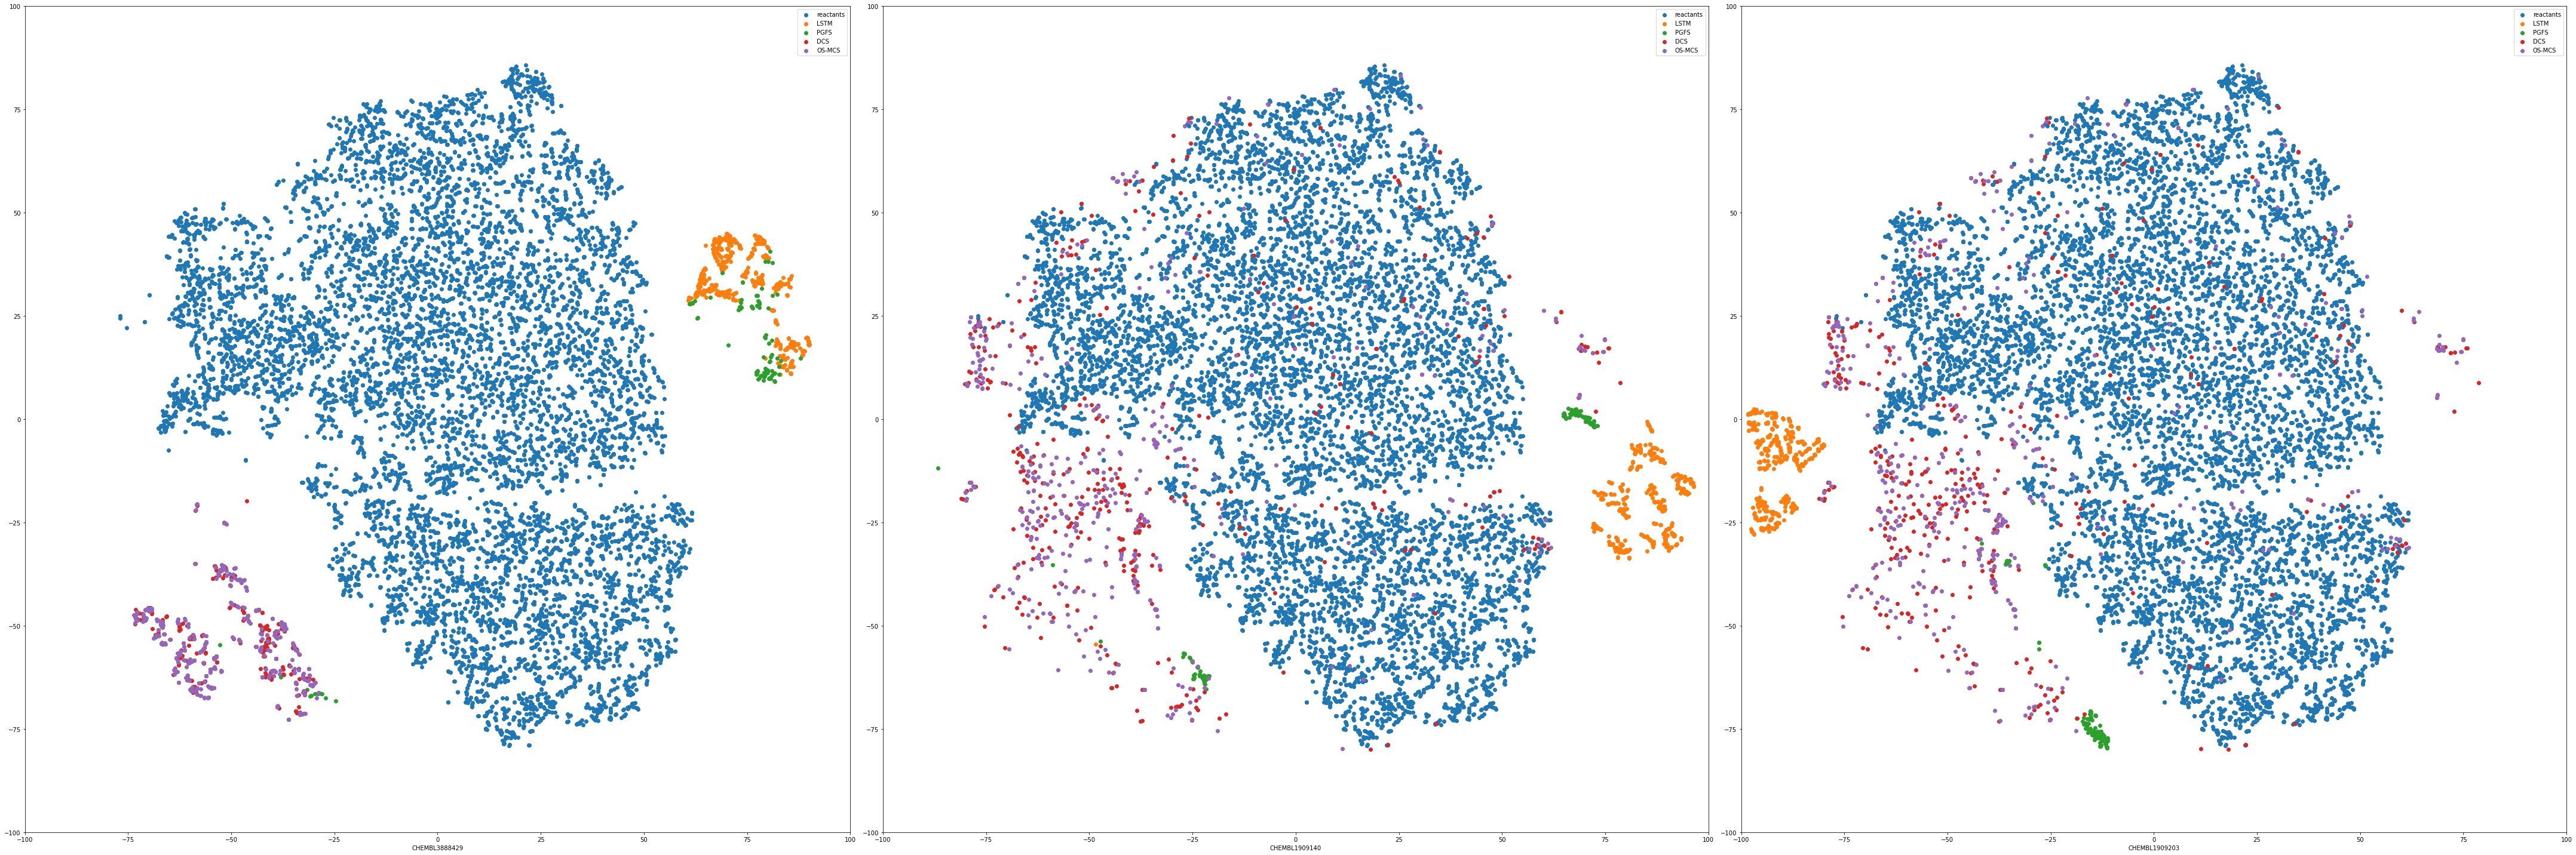

In [54]:
# fig = plt.figure(figsize=(20,20))
fig, axs = plt.subplots(1,3,figsize=(60,20))
for dataset_name, ax in zip(pgfs_out.keys(), axs):
    ax.set_xlim((-100, 100))
    ax.set_ylim((-100, 100))
    ax.set_xlabel(dataset_name)
    ax.scatter(reactants_embedded[:, 0], reactants_embedded[:, 1], label='reactants')
    ax.scatter(lstm_e[dataset_name][:, 0], lstm_e[dataset_name][:, 1], label='LSTM')
    ax.scatter(pgfs_e[dataset_name][:, 0], pgfs_e[dataset_name][:, 1], label='PGFS')
    ax.scatter(dcs_e[dataset_name][:, 0], dcs_e[dataset_name][:, 1], label='DCS')
    ax.scatter(mcs_e[dataset_name][:, 0], mcs_e[dataset_name][:, 1], label='OS-MCS')
    ax.legend()
plt.tight_layout()
plt.show()